## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [20]:
X.isnull().values.any()

False

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

Пропущенные значения в датасете отсутствуют. Категориальные значения в наборе данных также отсутствуют — все значения имеют тип float

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [18]:
from sklearn import model_selection

In [22]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, stratify=y)
np.random.seed(0)
# аргумент stratify необходимо использовать для одинакового баланса классов в тестовой и обучающей выборках

In [23]:
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.030,3.17,1185.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.700,1.56,750.0
121,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.930,3.69,465.0
31,13.58,1.66,2.36,19.1,106.0,2.86,3.19,0.22,1.95,6.90,1.090,2.88,1515.0
19,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.960,3.36,845.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,12.08,1.13,2.51,24.0,78.0,2.00,1.58,0.40,1.40,2.20,1.310,2.72,630.0
157,12.45,3.03,2.64,27.0,97.0,1.90,0.58,0.63,1.14,7.50,0.670,1.73,880.0
68,13.34,0.94,2.36,17.0,110.0,2.53,1.30,0.55,0.42,3.17,1.020,1.93,750.0
40,13.56,1.71,2.31,16.2,117.0,3.15,3.29,0.34,2.34,6.13,0.950,3.38,795.0


**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


In [24]:
k_nbrs = np.array([1, 3, 5, 10, 15, 25])
X_train = X_train[['alcohol', 'magnesium']]
X_test = X_test[['alcohol', 'magnesium']]

scaler = StandardScaler()
scaler.fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)
accuracy_train = []
accuracy_test = []
clf_plots = []
for k in k_nbrs:
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(X_train_transformed, y_train)
  y_predicted_train = clf.predict(X_train_transformed)
  y_predicted_test = clf.predict(X_test_transformed)
  clf_plots.append(clf)
  accuracy_train.append(np.mean(y_train == y_predicted_train))
  accuracy_test.append(np.mean(y_test == y_predicted_test))

accuracy_data = pd.DataFrame({'k': k_nbrs, 'train': accuracy_train, 'test': accuracy_test})
accuracy_data.reset_index(drop=True, inplace=True)
accuracy_data

,k,train,test
0,1,0.991935,0.722222
1,3,0.790323,0.777778
2,5,0.782258,0.759259
3,10,0.750000,0.777778
4,15,0.717742,0.740741
5,25,0.685484,0.740741


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [25]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [26]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

6it [20:46, 207.68s/it]


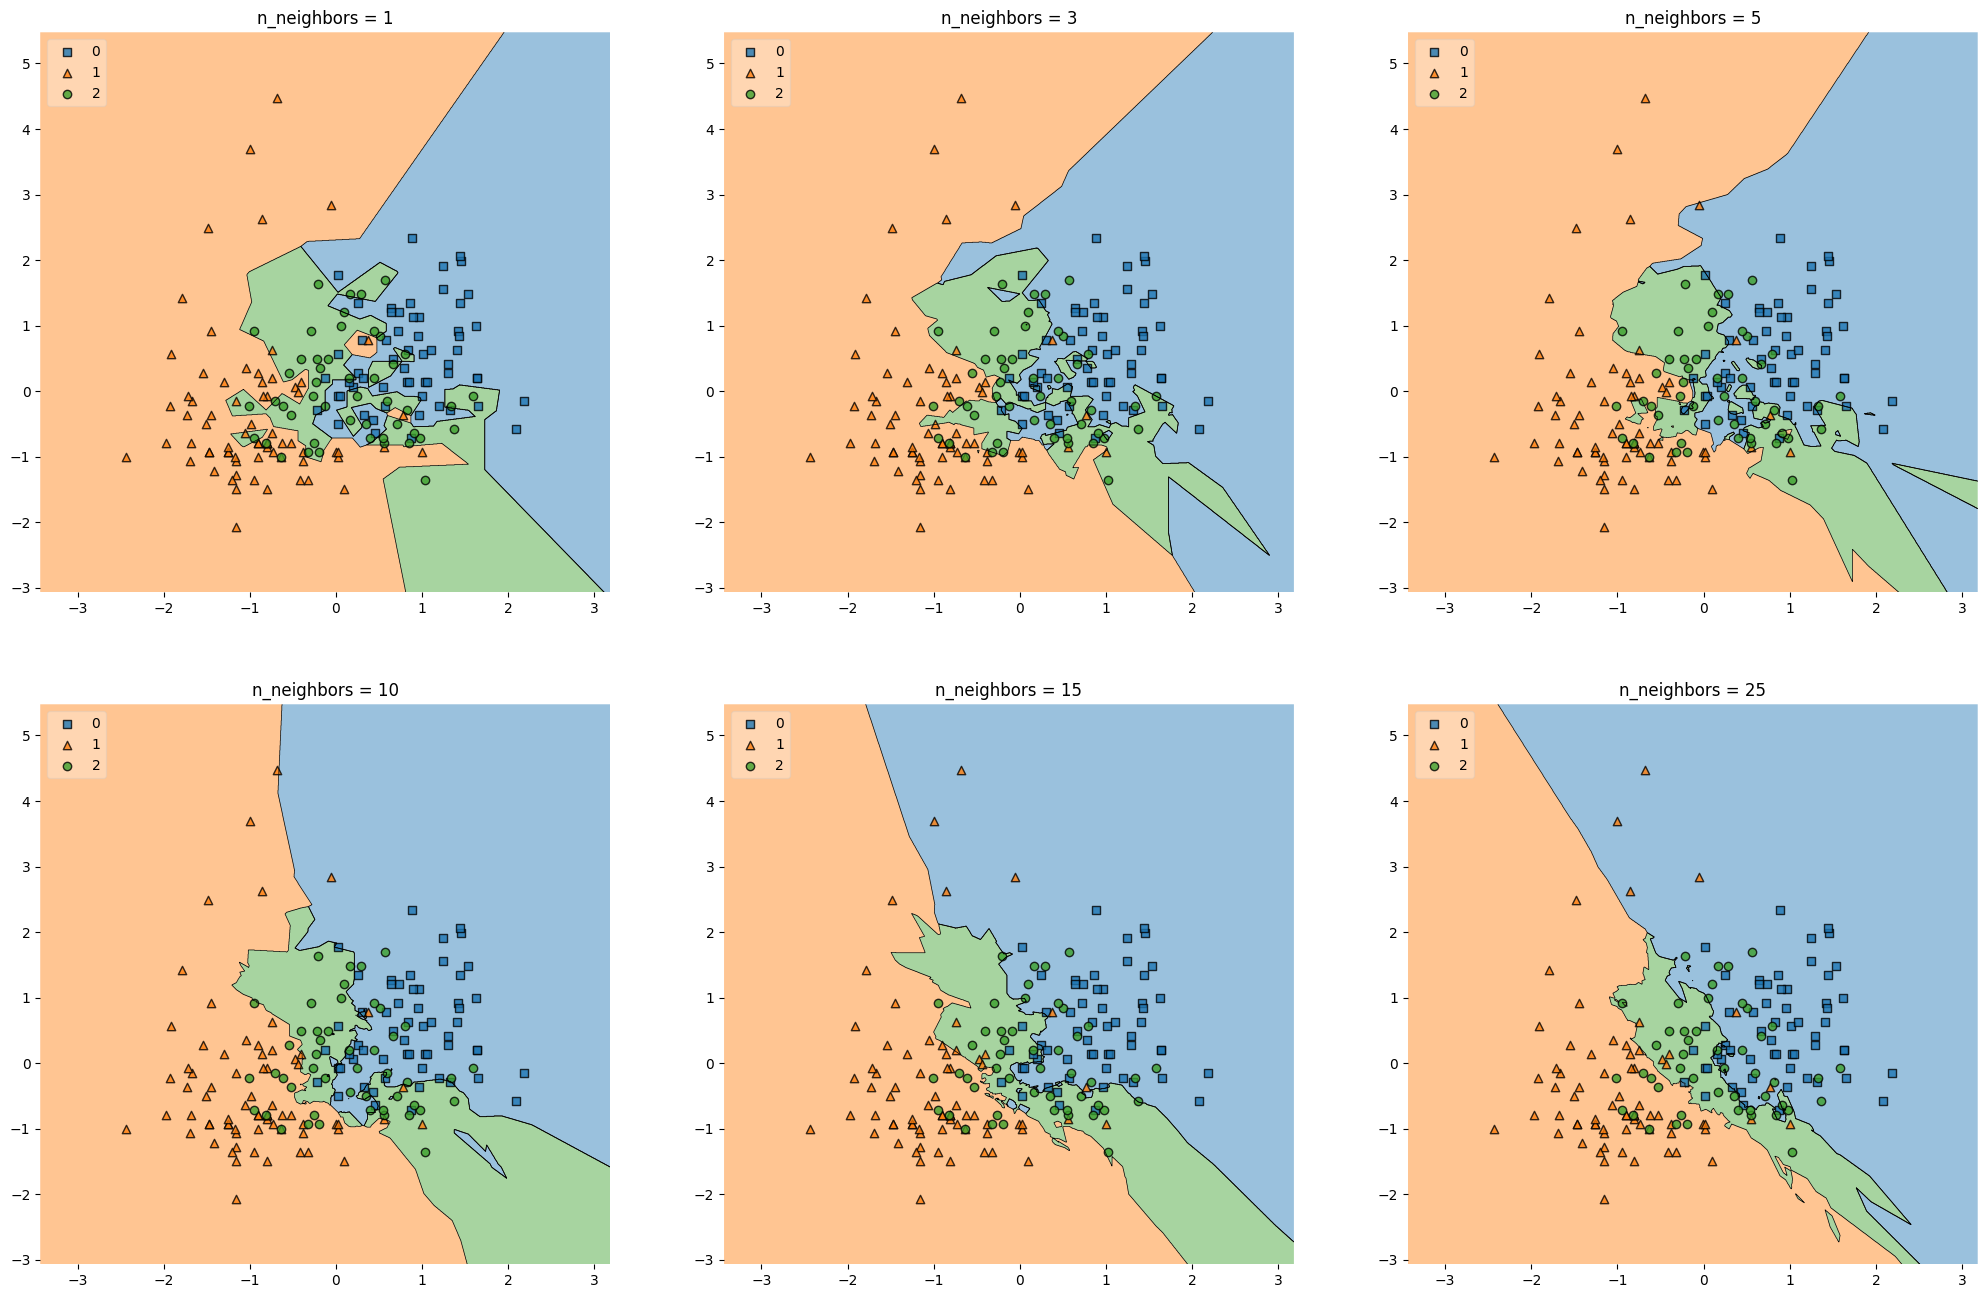

In [25]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
from tqdm import tqdm

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(25,16))

labels = ['n_neighbors = 1', 'n_neighbors = 3', 'n_neighbors = 5', 'n_neighbors = 10', 'n_neighbors = 15', 'n_neighbors = 25']
for clf, lab, grd in tqdm(zip(clf_plots,
                         labels,
                         itertools.product([0, 1, 2], repeat=2))):

    clf.fit(X_train_transformed, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=scaler.transform(X[['alcohol', 'magnesium']]), y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

*Полученные графики (как и полученные значения доли правильных ответов) показывают, что оптимальным количеством соседей является 10. Явно переобученной моделью является модель с 1 ближайшим соседом (островки других цветов на поверхноястях «главного» цвета), в целом, сюда же можно отнести классификатор с 3 и 5 соседями, на графике четко видно островки другого цвета на поверхности первого цвета.*

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

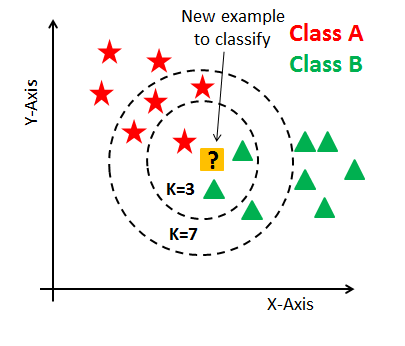

In [14]:
import numpy as np
import pandas as pd
from collections import Counter

class KNN:
    def __init__(self, k:int):
      self.k = k

    def fit(self, X, y):
      self.train = np.column_stack([(X-np.mean(X))/np.std(X), y])

    def predict(self, X):
      res = []
      X = (X - np.mean(X)) / ((np.std(X) == 0) * 1 + np.std(X))
      matrix_ev = self.train[:, :2, None] - X.T
      distances = np.linalg.norm(matrix_ev, axis=1)
      indexes = np.argpartition(distances, self.k, axis=0)[:self.k]
      res = np.apply_along_axis(lambda x: Counter(self.train[x, 2]).most_common(1)[0][0], axis=0, arr=indexes)
      return res

    def count_distance(self, x, y):#эту функцию задавать не будем, так как расстояние между точками считаем сразу в предикте
      # YOUR CODE HERE
      pass


In [15]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [27]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [77]:
!pip install kaggle

In [78]:
!mkdir ~/.kaggle
!cp "/content/drive/MyDrive/kaggle.json" ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

In [80]:
!kaggle datasets download -d 'shivam2503/diamonds' -p /content/

  0% 0.00/733k [00:00<?, ?B/s]
100% 733k/733k [00:00<00:00, 45.4MB/s]


In [81]:
!unzip *.zip

Archive:  diamonds.zip
  inflating: diamonds.csv            


In [82]:
data = pd.read_csv('/content/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [84]:
data.isnull().values.any()#пропущенных значений в датасете нет

False

In [85]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head()
#столбец Unnamed: 0 является дополнительным, так как попросту дублирует индексы строк датафрейма

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

Помимо самой целевой переменной (разумеется) с ней бльше всего коррелируют признаки *сarat, x, y и z*

In [11]:
data.corr()

<ipython-input-11-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [12]:
cat_features_mask = (data.dtypes == "object").values
data_fl = data[data.columns[~cat_features_mask]]
data_hot = data[data.columns[cat_features_mask]]
data_hot = pd.get_dummies(data_hot, drop_first=True)
df = pd.concat([data_fl, data_hot], axis=1)
df

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [28]:
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

np.random.seed(0)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [31]:
linreg = LinearRegression().fit(X_train, y_train)
y_predicted_train = linreg.predict(X_train)
y_predicted_test = linreg.predict(X_test)
mse_train = mean_squared_error(y_train, y_predicted_train, squared=True)
mse_test = mean_squared_error(y_test, y_predicted_test, squared=True)
print(f'MSE on train: {mse_train}\nMSE on test: {mse_test}')

MSE on train: 1284661.862119126
MSE on test: 1259159.1137946642


**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

По модулю веса переменных *carat* и *x* на порядок больше остальных.

In [32]:
weights = pd.DataFrame({'x': X.columns.to_list()[:6], 'coefs':linreg.coef_[:6]})
weights

,x,coefs
0,carat,5278.119984
1,depth,-94.266936
2,table,-65.618372
3,x,-1050.024760
4,y,-2.647380
5,z,-40.568623


**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [3]:
from sklearn.linear_model import Lasso, Ridge

In [33]:
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)
y_predicted_train_lasso = lasso.predict(X_train)
y_predicted_test_lasso = lasso.predict(X_test)
mse_train_lasso = mean_squared_error(y_train, y_predicted_train_lasso, squared=True)
mse_test_lasso = mean_squared_error(y_test, y_predicted_test_lasso, squared=True)
print(f'MSE on train (lasso): {mse_train_lasso}\nMSE on test (lasso): {mse_test_lasso}')

MSE on train (lasso): 1343049.4702089045
MSE on test (lasso): 1328943.8043790197


In [34]:
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
y_predicted_train_ridge = ridge.predict(X_train)
y_predicted_test_ridge = ridge.predict(X_test)
mse_train_ridge = mean_squared_error(y_train, y_predicted_train_ridge, squared=True)
mse_test_ridge = mean_squared_error(y_test, y_predicted_test_ridge, squared=True)
print(f'MSE on train (ridge): {mse_train_ridge}\nMSE on test (ridge): {mse_test_ridge}')

MSE on train (ridge): 1284783.3639957649
MSE on test (ridge): 1260031.2586135971


In [49]:
weights #веса до регуляризации

,x,coefs
0,carat,5278.119984
1,depth,-94.266936
2,table,-65.618372
3,x,-1050.024760
4,y,-2.647380
5,z,-40.568623


In [51]:
weights_ridge = pd.DataFrame({'x': X.columns.to_list()[:6], 'coefs':ridge.coef_[:6]})
weights_ridge

,x,coefs
0,carat,5240.032594
1,depth,-92.462101
2,table,-65.791097
3,x,-1008.689745
4,y,-4.490211
5,z,-44.057134


In [50]:
weights_lasso = pd.DataFrame({'x': X.columns.to_list()[:6], 'coefs':lasso.coef_[:6]})
weights_lasso

,x,coefs
0,carat,4784.582238
1,depth,-100.464174
2,table,-76.807094
3,x,-603.524914
4,y,-0.000000
5,z,-40.091536


L2 (Lasso) регуляризатор ощутимо понизил только вес признака carat, вес признака y занулил, однако некоторые веса, например при признаке depth, увеличились, остальные веса уменьшились незначительно. Но при этом именно с приминением Lasso вышла сравнительно самая большая MSE, а на регрессии до регуляризации наоборот самая низкая MSE, причем различия между ними ощутимые, из чего мы можем сделать вывод, что проблема мультиколленеарности достаточно проявилась в изначальной регрессии, так как даже относительно незначительное уменьшение весов ощутимо изменили MSE в большую сторону.

**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

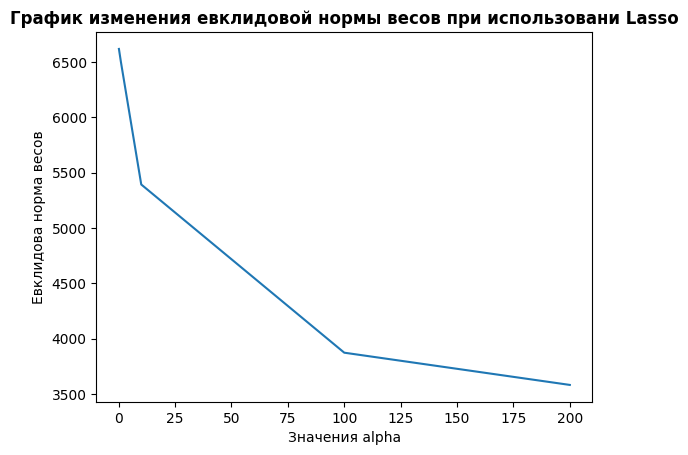

In [75]:
alphas = [0.1, 1, 10, 100, 200]
norms = []
for a in alphas:
  lasso = Lasso(alpha = a)
  lasso.fit(X_train, y_train)
  norms.append(np.linalg.norm(lasso.coef_))

plt.title('График изменения евклидовой нормы весов при использовани Lasso', weight='bold')
plt.plot(alphas, norms)
plt.xlabel('Значения alpha')
plt.ylabel('Евклидова норма весов')
plt.show()

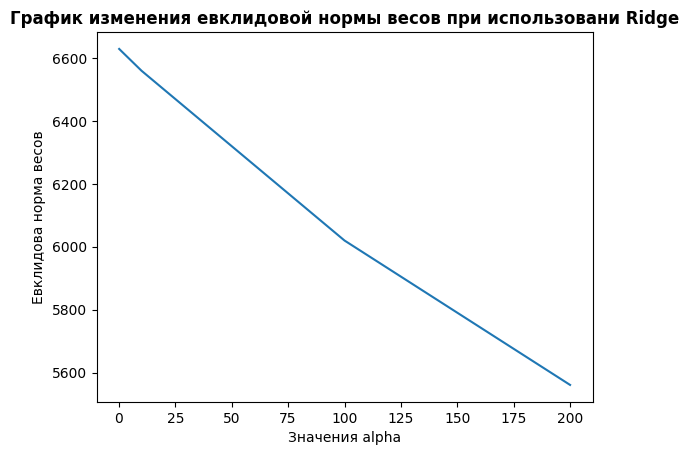

In [61]:
alphas = [0.1, 1, 10, 100, 200]
norms = []
for a in alphas:
  ridge = Ridge(alpha = a)
  ridge.fit(X_train, y_train)
  norms.append(np.linalg.norm(ridge.coef_))

plt.title('График изменения евклидовой нормы весов при использовани Ridge', weight='bold')
plt.plot(alphas, norms)
plt.xlabel('Значения alpha')
plt.ylabel('Евклидова норма весов')
plt.show()

Из приведенных графиков ясно, что Lasso агрессивнее уменьшает веса, таким образом, смотря на то, как сильно уменьшился вес на том или ином признаке, можно делать вывод о его влиянии на значение целевой переменной. Так, в нашем случае, самой «влиятельной» фичей является *carat*, у которого ощутимее остальных уменьшился вес.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [50]:
from sklearn.linear_model import LassoCV

In [68]:
lcv = LassoCV(alphas = alphas, cv=5)
lcv.fit(X_train, y_train)
print(lcv.alphas_, '\n', alphas, '\n', np.mean(lcv.mse_path_, axis=1))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1139598866.5661163, tolerance: 48309472.87280814
  model = cd_fast.enet_coordinate_descent_gram(


[2.e+02 1.e+02 1.e+01 1.e+00 1.e-01] 
 [0.1, 1, 10, 100, 200] 
 [2167431.57301813 1792168.41933385 1346195.9333768  1288260.08692634
 1293159.32304376]


Минимальная усредненное значение ошибки наблюдается при alpha==100

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [72]:
lasso = Lasso(alpha=100)
lasso.fit(X_train, y_train)
weights_lasso = pd.DataFrame({'x': X.columns.to_list(), 'coefs':lasso.coef_})
weights_lasso

,x,coefs
0,carat,3831.290413
1,depth,-21.495503
2,table,-0.000000
3,x,0.000000
4,y,0.000000
5,z,0.000000
6,cut_Good,-0.000000
7,cut_Ideal,45.282778
8,cut_Premium,0.000000
9,cut_Very Good,0.000000


Выше приведен датафрейм, в котором построчно признаки соответсвуют весам. Из него мы видим, что неинформативными признаками оказалиcь *x, y, z, color_E, color_F, color_G, cut_Premium, cut_Very Good, cut_Good, table* — веса этих признаков регуляризатор занулил. Самым же значимым является признак carat, что логично объяснимо, ведь карат — это мера веса алмаза, а значит именно она влияет больше всего на его цену (целевая переменная price). Однако занулились параметры, отвечающие за качество огранки и цвет, что также должно влиять на стоимость.

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [73]:
y_predicted_test_lasso_new = lasso.predict(X_test)
mse_test_lasso_new = mean_squared_error(y_test, y_predicted_test_lasso_new, squared=True)

linreg = LinearRegression().fit(X_train, y_train)
y_predicted_test = linreg.predict(X_test)
mse_test = mean_squared_error(y_test, y_predicted_test, squared=True)

print(f'MSE on test without Lasso: {mse_test}\nMSE on test with Lasso: {mse_test_lasso_new}')

MSE on test without Lasso: 1259159.1137946642
MSE on test with Lasso: 1763773.3943830878


Вы видим, что ошибка на регресси без регуляризатора сильно меньше. Это неудивительно, ведь регулризатор занулил многие ключевые для оценки стоимости бриллиантов признаки (качество огранки, например), отчего предсказание на регрессии без регуляризатора более точное.